In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, metrics
import seaborn as sns

### 1: Exploratory Data Analysis

#### Importing Data

In [2]:
df = pd.read_csv('CarPrice_Assignment.csv')
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


#### Checking Column Types

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [4]:
df['doornumber'].head()

0     two
1     two
2     two
3    four
4    four
Name: doornumber, dtype: object

In [5]:
df['cylindernumber'].head()

0    four
1    four
2     six
3    four
4    five
Name: cylindernumber, dtype: object

- Semua kolom dari dataset 'CarPrice' tidak memiliki 'missing value'
- kolom 'doornumber' dan 'cylindernumber' berisi data text angka sehingga lebih baik diganti dengan numerik dan mengubah tipenya menjadi 'int64'

In [6]:
#change dtype of cylindernumber and doornumber from object to int

dict_car = {
    'two':'2',
    'three':'3',
    'four':'4',
    'five':'5',
    'six':'6',
    'eight':'8',
    'twelve':'12'
}

df['cylindernumber'] = df['cylindernumber'].map(dict_car).astype('int64')
df['doornumber'] = df['doornumber'].map(dict_car).astype('int64')

In [7]:
df['doornumber'].head()

0    2
1    2
2    2
3    4
4    4
Name: doornumber, dtype: int64

In [8]:
df['cylindernumber'].head()

0    4
1    4
2    6
3    4
4    5
Name: cylindernumber, dtype: int64

#### Checking Duplicated Data

In [9]:
dup = df[df.duplicated()]
dup

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


#### Statistical Information

In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
doornumber,205.0,3.121951,0.994966,2.00,2.00,4.00,4.00,4.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
cylindernumber,205.0,4.380488,1.080854,2.00,4.00,4.00,4.00,12.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00


#### Correlation Analysis

In [11]:
df.corr()["price"].sort_values()

highwaympg         -0.697599
citympg            -0.685751
car_ID             -0.109093
peakrpm            -0.085267
symboling          -0.079978
doornumber          0.031835
compressionratio    0.067984
stroke              0.079443
carheight           0.119336
boreratio           0.553173
wheelbase           0.577816
carlength           0.682920
cylindernumber      0.718305
carwidth            0.759325
horsepower          0.808139
curbweight          0.835305
enginesize          0.874145
price               1.000000
Name: price, dtype: float64

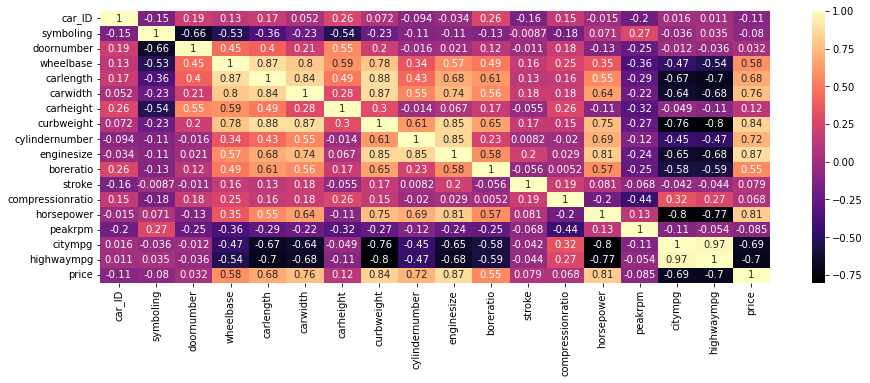

In [12]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True,cmap="magma")
plt.show()

- Variabel yang memiliki korelasi tinggi dengan variabel 'price' adalah 'wheelbase', 'carlength', 'carwidth', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio', 'horsepower', 'citympg', 'highwaympg'

#### Checking categories in df object

In [13]:
df['CarName'].value_counts()

toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: CarName, Length: 147, dtype: int64

In [14]:
df['fueltype'].value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

In [15]:
df['aspiration'].value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [16]:
df['carbody'].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

In [17]:
df['drivewheel'].value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

In [18]:
df['enginelocation'].value_counts()

front    202
rear       3
Name: enginelocation, dtype: int64

In [19]:
df['enginetype'].value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

In [20]:
df['fuelsystem'].value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64

#### Visualization

In [21]:
def vis_univar(data, column):
    sns.color_palette("pastel")
    fig, (ax_box, ax_hist) = plt.subplots(2, sharex = True, gridspec_kw = {'height_ratios':(.2, .8)})
    
    sns.boxplot(data = df, x = column, ax = ax_box)
    sns.histplot(data = df, x = column, ax = ax_hist, kde=True)
    
    ax_box.set(xlabel = '')
    ax_hist.set(ylabel = 'Histogram (Count)')
    
    plt.show()

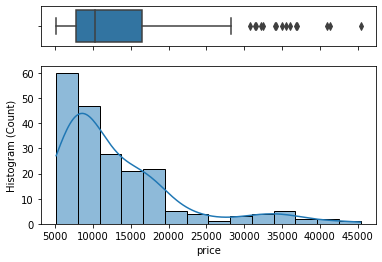

In [22]:
vis_univar(df, 'price')

- Terdapat outliers dari variabel 'price' namun karena data terlalu sedikit (205) dan data berbentuk skew right maka outliers tidak dihapus

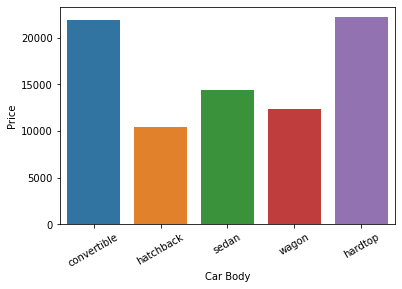

In [23]:
df.groupby('carbody')['price'].mean()
p=sns.barplot(x='carbody',y='price',data=df,ci=False)
plt.xlabel('Car Body')
plt.ylabel('Price')
plt.xticks(rotation = 30)
plt.show()

carbody convertible dan hardtop mempengaruhi harga mobil lebih tinggi dibandingkan tiga jenis carbody lainnya.

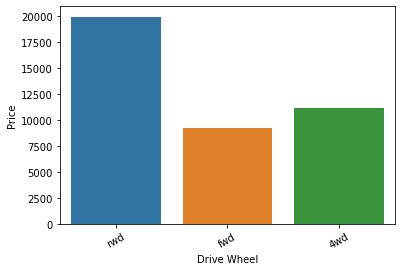

In [24]:
df.groupby('drivewheel')['price'].mean()
p=sns.barplot(x='drivewheel',y='price',data=df,ci=False)
plt.xlabel('Drive Wheel')
plt.ylabel('Price')
plt.xticks(rotation = 30)
plt.show()

drivewheel rwd mempengaruhi harga mobil lebih tinggi dibandingkan drivewheel fwd dan 4wd

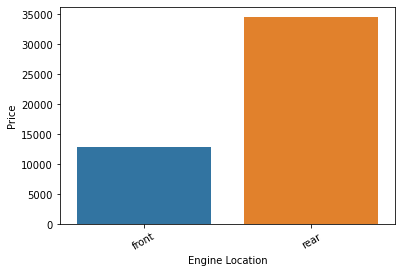

In [25]:
df.groupby('enginelocation')['price'].mean()
p=sns.barplot(x='enginelocation',y='price',data=df,ci=False)
plt.xlabel('Engine Location')
plt.ylabel('Price')
plt.xticks(rotation = 30)
plt.show()

mobil yang memiliki harga tinggi rata-rata menggunakan enginelocation rear dibandingkan front

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'mpfi'),
  Text(1, 0, '2bbl'),
  Text(2, 0, 'mfi'),
  Text(3, 0, '1bbl'),
  Text(4, 0, 'spfi'),
  Text(5, 0, '4bbl'),
  Text(6, 0, 'idi'),
  Text(7, 0, 'spdi')])

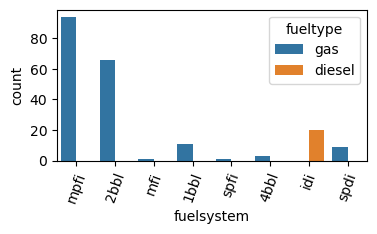

In [112]:
plt.figure(figsize=(4,2),dpi = 100)
sns.countplot(data = df , x ='fuelsystem',hue='fueltype')
plt.xticks(rotation = 70)

fueltype diesel hanya digunakan pada mobil dengan fuelsystem idi

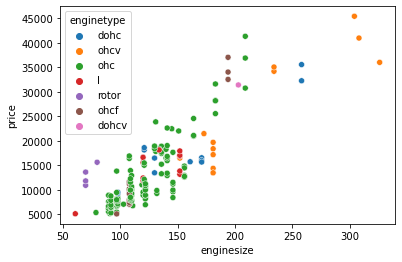

In [40]:
fig = plt.figure()  
ax = sns.scatterplot(data = df, x='enginesize', y = 'price', hue = 'enginetype')
plt.show() 

berdasarkan masing-masing enginetype, semakin besar enginesize maka rata-rata harga mobil semakin tinggi

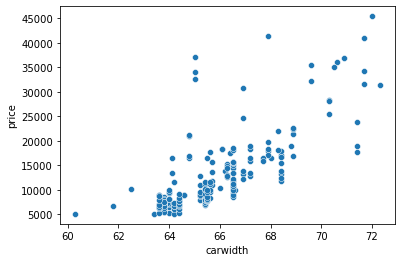

In [30]:
fig = plt.figure()  
ax = sns.scatterplot(data = df, x='carwidth', y = 'price')
plt.show() 

semakin tinggi carwidth maka semakin tinggi rata-rata harga mobil

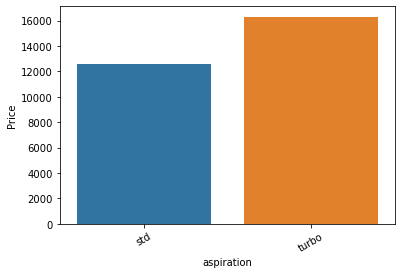

In [31]:
df.groupby('aspiration')['price'].mean()
p=sns.barplot(x='aspiration',y='price',data=df,ci=False)
plt.xlabel('aspiration')
plt.ylabel('Price')
plt.xticks(rotation = 30)
plt.show()

aspiration turbo mempengaruhi harga mobil lebih tinggi dibandingkan aspiration std

### One Hot Encoding

In [34]:
df1_obj=df.select_dtypes(["object"])
df1_obj.head()

,CarName,fueltype,aspiration,carbody,drivewheel,enginelocation,enginetype,fuelsystem
0,alfa-romero giulia,gas,std,convertible,rwd,front,dohc,mpfi
1,alfa-romero stelvio,gas,std,convertible,rwd,front,dohc,mpfi
2,alfa-romero Quadrifoglio,gas,std,hatchback,rwd,front,ohcv,mpfi
3,audi 100 ls,gas,std,sedan,fwd,front,ohc,mpfi
4,audi 100ls,gas,std,sedan,4wd,front,ohc,mpfi


In [35]:
df1_obj = pd.get_dummies(df1_obj)
df1_obj.head()

,CarName_Nissan versa,CarName_alfa-romero Quadrifoglio,CarName_alfa-romero giulia,CarName_alfa-romero stelvio,CarName_audi 100 ls,CarName_audi 100ls,CarName_audi 4000,CarName_audi 5000,CarName_audi 5000s (diesel),CarName_audi fox,...,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [36]:
df1_num=df.select_dtypes(["float64","int64"])

In [37]:
df1=pd.concat([df1_obj,df1_num],axis=1)

In [38]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Columns: 194 entries, CarName_Nissan versa to price
dtypes: float64(8), int64(10), uint8(176)
memory usage: 64.2 KB


In [39]:
#Separate into X_train, X_test, y_train, y_test (proportion 80-20)

X = df1.drop(['car_ID','price','CarName_Nissan versa','fueltype_gas','aspiration_std','carbody_sedan','drivewheel_fwd',
             'enginelocation_front','enginetype_ohc','fuelsystem_mpfi'],axis=1)
y = df1["price"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=1)

In [40]:
my_list = list(X)

### Linear Regression

In [41]:
# create linear regression object
reg = linear_model.LinearRegression()
 
# train the model using the training sets
reg.fit(X_train, y_train)
 
# regression coefficients
print('Coefficients: ', reg.coef_)

# regression intercept
print('Intercept: ', reg.intercept_)

Coefficients:  [-5.11536838e+03 -2.56155688e+03  4.43443117e+02  1.12169235e+02
 -5.56192619e+03 -5.52997192e+03 -8.74020645e+03 -3.60304782e+03
  4.58547180e+03  3.43515430e+03  1.40114607e+04  1.32388486e+04
  1.88162471e+04  4.00784756e-08  1.03196462e+04  9.31785389e+02
 -5.64025838e+03  2.92852823e+04 -5.38193490e-10  1.35038644e+04
  3.06077441e+04  3.53689469e+03  5.37995762e+03  1.31421984e-10
 -1.46392936e+03 -4.10606441e+02 -6.26185509e+02 -2.10618571e+03
 -3.02318571e+03  6.82121026e-10 -3.16504156e-10 -3.78495996e+03
  5.14319254e-10 -2.48724535e+03 -8.65828587e+02  7.30453535e+03
 -5.43423084e-10  2.76031642e-10  2.44329895e+03 -3.16849058e+03
  2.66666689e-10 -9.68061956e+01 -3.40151018e-10  9.24528602e+03
 -2.65134273e+03  5.86909069e+02  2.41513978e+03  2.03352689e+04
 -6.63021638e-10  2.83517552e+04 -4.92056849e+03 -4.77584087e+03
 -1.71212618e+03  2.54466198e+01  5.36601874e-11 -8.22497430e+02
 -4.44326608e+03 -1.83735340e+03 -2.60407015e+03  1.20814607e+03
 -4.292744

In [42]:
y_pred = reg.predict(X_test)

In [43]:
# MAE
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

4765.509875155452

In [44]:
# MSE
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

47431894.687182546

In [45]:
# RMSE
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred, squared=False)

6887.081725025669

In [46]:
# R-square
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.1368254872830319

### Ridge Regression

In [47]:
from sklearn.linear_model import Ridge
model = Ridge()
model.fit(X_train, y_train)

# regression coefficients
print('Coefficients: ', model.coef_)

# regression intercept
print('Intercept: ', model.intercept_)

Coefficients:  [ 1.00336642e+03 -2.41426286e+02  1.26107371e+03  1.36948412e+03
 -1.29960903e+03  1.11990622e+03 -2.35162865e+02  4.13783636e+02
  4.23383933e+02  1.95189178e+03  1.90393076e+03  2.75701967e+03
  1.78142193e+03  0.00000000e+00  2.37996719e+03  6.14760823e+02
  2.40981544e+02  3.72474405e+02  0.00000000e+00  1.16161070e+03
  3.11374293e+03  1.52876093e+03  9.72439443e+02  0.00000000e+00
  4.36982078e+02  2.66456251e+01  3.69212364e+02  4.79386476e+01
 -4.10561353e+02  0.00000000e+00  0.00000000e+00 -3.34307914e+02
  0.00000000e+00 -2.16956789e+02  3.01068196e+02 -2.71781722e+02
  0.00000000e+00  0.00000000e+00  1.49771208e+03  3.72732464e+02
  0.00000000e+00 -6.33214206e+02  0.00000000e+00 -2.16712540e+02
 -9.55642171e+01  9.77052257e+02 -4.41100684e+02  1.49458580e+03
  0.00000000e+00 -2.56293229e+03  6.05522802e+01  1.00206773e+02
  5.96244014e+01  7.41297811e+02  0.00000000e+00  5.62984064e+02
 -1.51061732e+03  1.08607544e+02  7.79179334e+01  2.12134550e+03
  4.032497

In [48]:
my_list

['CarName_alfa-romero Quadrifoglio',
 'CarName_alfa-romero giulia',
 'CarName_alfa-romero stelvio',
 'CarName_audi 100 ls',
 'CarName_audi 100ls',
 'CarName_audi 4000',
 'CarName_audi 5000',
 'CarName_audi 5000s (diesel)',
 'CarName_audi fox',
 'CarName_bmw 320i',
 'CarName_bmw x1',
 'CarName_bmw x3',
 'CarName_bmw x4',
 'CarName_bmw x5',
 'CarName_bmw z4',
 'CarName_buick century',
 'CarName_buick century luxus (sw)',
 'CarName_buick century special',
 'CarName_buick electra 225 custom',
 'CarName_buick opel isuzu deluxe',
 'CarName_buick regal sport coupe (turbo)',
 'CarName_buick skyhawk',
 'CarName_buick skylark',
 'CarName_chevrolet impala',
 'CarName_chevrolet monte carlo',
 'CarName_chevrolet vega 2300',
 'CarName_dodge challenger se',
 'CarName_dodge colt (sw)',
 'CarName_dodge colt hardtop',
 'CarName_dodge coronet custom',
 'CarName_dodge coronet custom (sw)',
 'CarName_dodge d200',
 'CarName_dodge dart custom',
 'CarName_dodge monaco (sw)',
 'CarName_dodge rampage',
 'CarNam

In [49]:
y_pred = model.predict(X_test)

In [50]:
# MAE
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

1999.0707090604214

In [51]:
# MSE
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

10993045.370887317

In [52]:
# RMSE
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred, squared=False)

3315.5761747978763

In [53]:
# R-square
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7999464992096266

### Random Forest Tuning

In [54]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse

base_model = RandomForestRegressor()

In [55]:
base_model.fit(X_train, y_train)
base_pred = base_model.predict(X_test)
base_rmse = np.sqrt(mse(y_test, base_pred))
print('Base Model has RMSE:', base_rmse)
print('Base Model has R2-Score:', r2_score(y_test, base_pred))

Base Model has RMSE: 2232.0279520551157
Base Model has R2-Score: 0.9093375620382901


In [106]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 500, num = 20)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 500, num = 20)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [1, 2, 3, 4, 5, 6, 7, 8]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3, 4, 5, 6, 7]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [1, 27, 53, 79, 106, 132, 158, 184, 211, 237, 263, 289, 316, 342, 368, 394, 421, 447, 473, 500], 'max_features': ['auto', 'sqrt'], 'max_depth': [1, 27, 53, 79, 106, 132, 158, 184, 211, 237, 263, 289, 316, 342, 368, 394, 421, 447, 473, 500, None], 'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7]}


In [107]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 200, cv = 5, verbose=3, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.92776491 0.62804589 0.92731905 0.64854443 0.92877864 0.73049685
 0.91290627 0.84730793 0.72489639 0.7885528  0.92129049 0.91745549
 0.46229737 0.71103669 0.93137088 0.91208273 0.68784959 0.90378651
 0.71127247 0.71932148 0.72473886 0.71424598 0.85704753 0.90283437
 0.90318966 0.90029292 0.92411764 0.92465635 0.7170599  0.91156874
 0.66544841 0.46604874 0.4681416  0.93129715 0.93051491 0.84939644
 0.74471909        nan 0.498079   0.9015256         nan 0.73750446
 0.68017213 0.91830358 0.92947592 0.74549285 0.92451892 0.68243952
 0.78414363 0.92579503 0.90488207 0.79438155        nan 0.91752721
 0.898389   0.85740876 0.70700834 0.46772115 0.73692436 0.79761951
 0.79267343 0.7230067  0.9250817  0.90631777 0.65435451 0.92740959
 0.91877713 0.91259323 0.92596057 0.90833232        nan 0.90409698
 0.72020686        nan 0.89684345        nan        n

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=200,
                   n_jobs=-1,
                   param_distributions={'max_depth': [1, 27, 53, 79, 106, 132,
                                                      158, 184, 211, 237, 263,
                                                      289, 316, 342, 368, 394,
                                                      421, 447, 473, 500,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7],
                                        'min_samples_split': [1, 2, 3, 4, 5, 6,
                                                              7, 8],
                                        'n_estimators': [1, 27, 53, 79, 106,
                                                         132, 158, 184, 211,
     

In [108]:
rf_random.best_params_

{'n_estimators': 27,
 'min_samples_split': 4,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 211}

In [109]:
new_pred = rf_random.best_estimator_.predict(X_test)
new_rmse = np.sqrt(mse(y_test, new_pred))
print('New Model has RMSE:', new_rmse)
print('New Model has R2-Score:', r2_score(y_test, new_pred))

New Model has RMSE: 2187.952158410769
New Model has R2-Score: 0.9128828261254749


In [110]:
print('Improvement of:', ((base_rmse - new_rmse)/base_rmse)*100, '%')

Improvement of: 1.9746972077013931 %


#### Linear Regression
- MAE = 4765.509875155452
- RMSE = 6887.081725025669
- R-Square = 0.1368254872830319

#### Ridge Regression
- MAE = 1999.0707090604214
- RMSE = 3315.5761747978763
- R-Square = 0.7999464992096266

Ridge regression memiliki error yang lebih minimum dan nilai r-square lebih tinggi dibandingkan dengan Linear Regression. 

#### Random Forest Tuning
Improvement : 1.9746972077013931 %

Dari random forest tuning didapatkan model improvement sebesar 1.97 %, sehingga model yang dipilih adalah random forest

#### Mobil dengan harga tinggi memiliki spesifikasi:
- highwaympg tinggi
- peakrpm tinggi
- enginesize tinggi
- symboling tinggi
- doornumber tinggi
- wheelbase tinggi
- carwidth tinggi
- carheight tinggi
- curbweight tinggi
- citympg rendah
- carlength rendah
- cylindernumber rendah
- horsepower rendah
- boreratio rendah
- stroke rendah
- compressionratio rendah
- fuelsystem_4bbl dan fuelsystem_idi mempengaruhi harga mobil lebih tinggi daripada fuelsystem_mpfi
- enginetype_ohcv dan enginetype_rotor mempengaruhi harga mobil lebih tinggi daripada enginetype_ohc
- enginelocation_rear mempengaruhi harga mobil lebih tinggi daripada enginelocation_front
- drivewheel_rwd mempengaruhi harga mobil lebih tinggi daripada drivewheel_fwd 
- carbody_convertible dan carbody_hardtop mempengaruhi harga mobil lebih tinggi daripada carbody_sedan
- aspiration_turbo mempengaruhi harga mobil lebih tinggi daripada aspiration_std
- fueltype_diesel mempengaruhi harga mobil lebih tinggi daripada fueltype_gas


- Semua jenis porche memiliki harga yang lebih tinggi dibandingkan Nissan versa
- Hanya jenis honda civic yang memiliki harga lebih tinggi dibandingkan Nissa versa
- untuk brand bmw, semua jenisnya memiliki harga yang lebih tinggi daripada Nissan versa kecuali jenis bmw x5 
- sehingga dapat disimpulkan brand name tidak terlalu mempengaruhi harga mobil
